In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob
import re

sys.path.append("/private/home/yuandong/tools2/")
from cluster_utils import PlotData, ArgFilter, get_stats

In [2]:
import sys
sys.executable

'/private/home/yuandong/miniconda3/envs/go10/bin/python'

In [116]:
jobnames = [ "theory_thm5_4" ]
all_stats = get_stats(jobnames)

In [155]:
jobnames = [ "theory_thm5_5" ]
all_stats2 = get_stats(jobnames)

In [156]:
all_stats += all_stats2

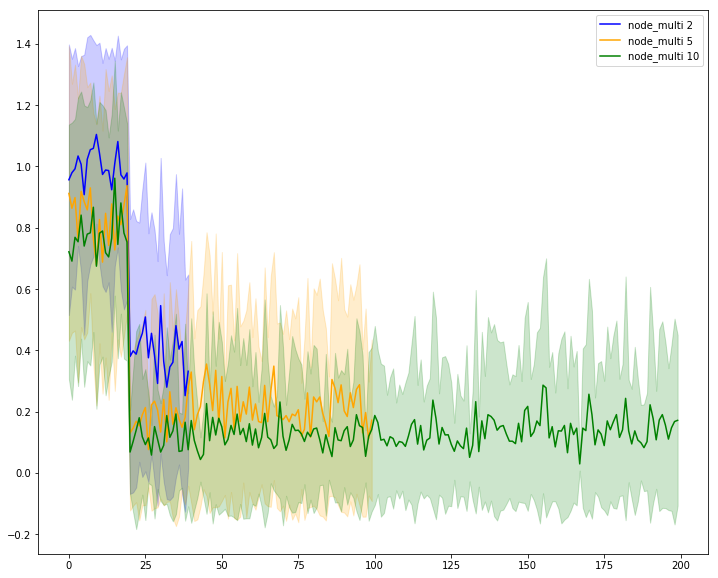

In [131]:
plt.figure(figsize=(12, 10))

plot_datas = []
legends = []

for node_multi in (2, 5, 10):
    f = ArgFilter(perturb=[0.3,1.0], ks=[10, 20, 30], node_multi=node_multi, bias=0.1)
    # f = ArgFilter(preturb=[1,1], ks=[10, 15, 25, 30], node_multi=node_multi)
    plot_data = PlotData(f.info())
    
    label = "node_multi %d" % node_multi
    legends.append(label)
    
    for stats in all_stats:
        if not f.check(stats["args"]):
            continue
        w_final_norm = stats["data"][-1]["Ws"][1].norm(dim=1)[:-1]
        n = w_final_norm.size(0)
        plot_data.add({
            "x": np.array(list(range(n))), 
            label : w_final_norm.numpy()
        })
    plot_datas.append(plot_data)
    
colors = ["b", "orange", "g", "r"]    
for plot_data, legend, c in zip(plot_datas, legends, colors):
    plot_data.plot(plt, "x", [legend], [c]) 
    
plt.legend()

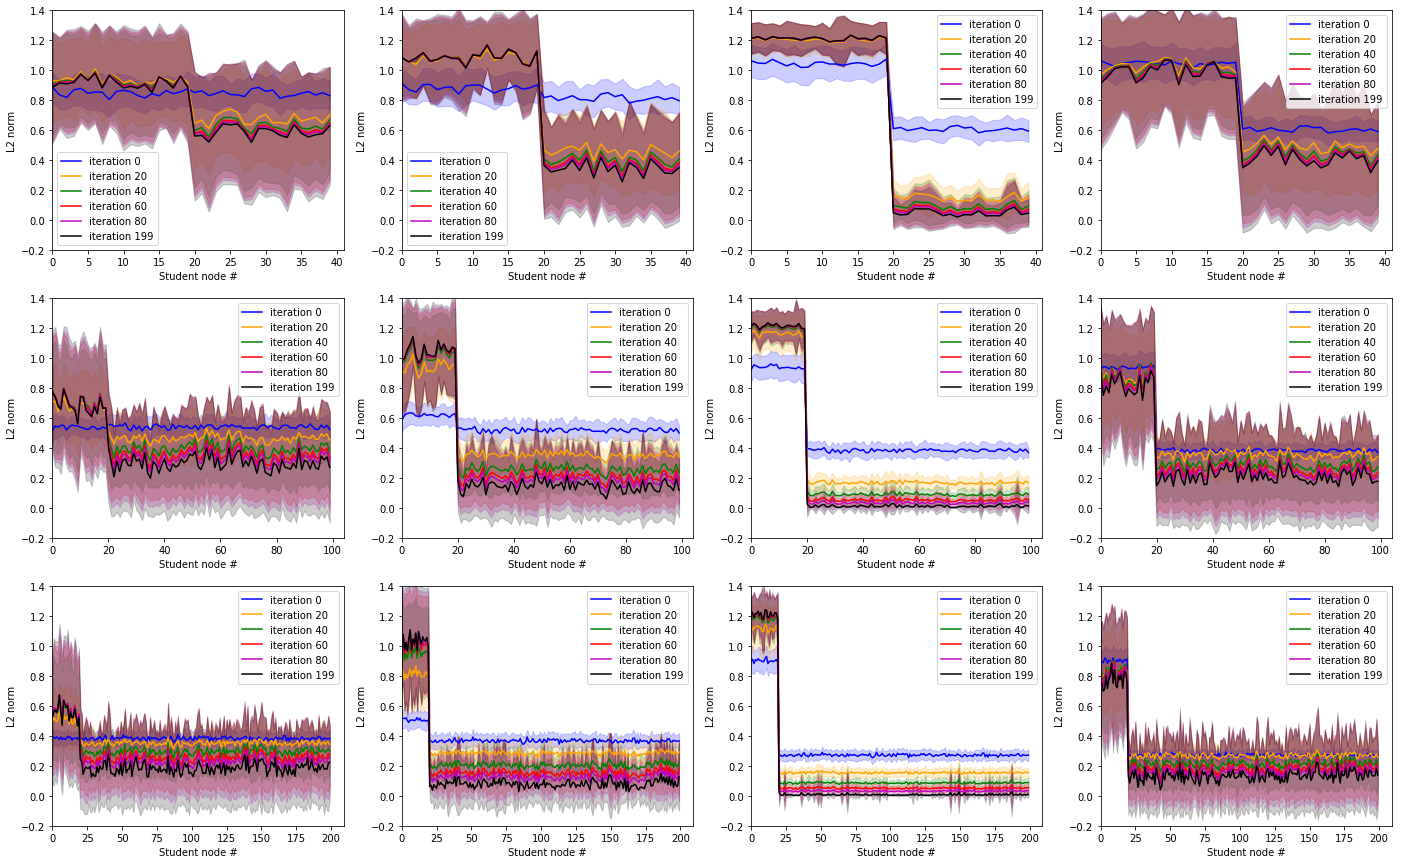

In [160]:
plt.figure(figsize=(24, 15))

count = 1
for node_multi in (2, 5, 10):
    for perturb in ([1.0,0], [1.0,0.3], [1.0,1.0], [0.3,1.0]):
        plt.subplot(3, 4, count)
        count += 1

        plot_datas = []
        legends = []

        for i in (0, 20, 40, 60, 80, 199):
            f = ArgFilter(perturb=perturb, ks=[10, 20, 30], node_multi=node_multi)
            # f = ArgFilter(perturb=[1.0,1.0], ks=[10, 15, 25, 30], node_multi=node_multi)
            plot_data = PlotData(f.info())

            label = "iteration %d" % i
            legends.append(label)

            for stats in all_stats:
                if not f.check(stats["args"]):
                    continue
                w_final_norm = stats["data"][i]["Ws"][1].norm(dim=1)[:-1]
                n = w_final_norm.size(0)
                plot_data.add({
                    "x": np.array(list(range(n))), 
                    label : w_final_norm.numpy()
                })
            plot_datas.append(plot_data)

        colors = ["b", "orange", "g", "r", "m", "k"]    
        for plot_data, legend, c in zip(plot_datas, legends, colors):
            plot_data.plot(plt, "x", [legend], [c]) 

        plt.axis([0, None, -0.2, 1.4])
        plt.xlabel('Student node #')
        plt.ylabel('L2 norm')

        plt.legend()

plt.savefig("thm5.pdf")

In [ ]:
jobnames = [ "theory_thm5_6" ]
all_stats3= get_stats(jobnames)

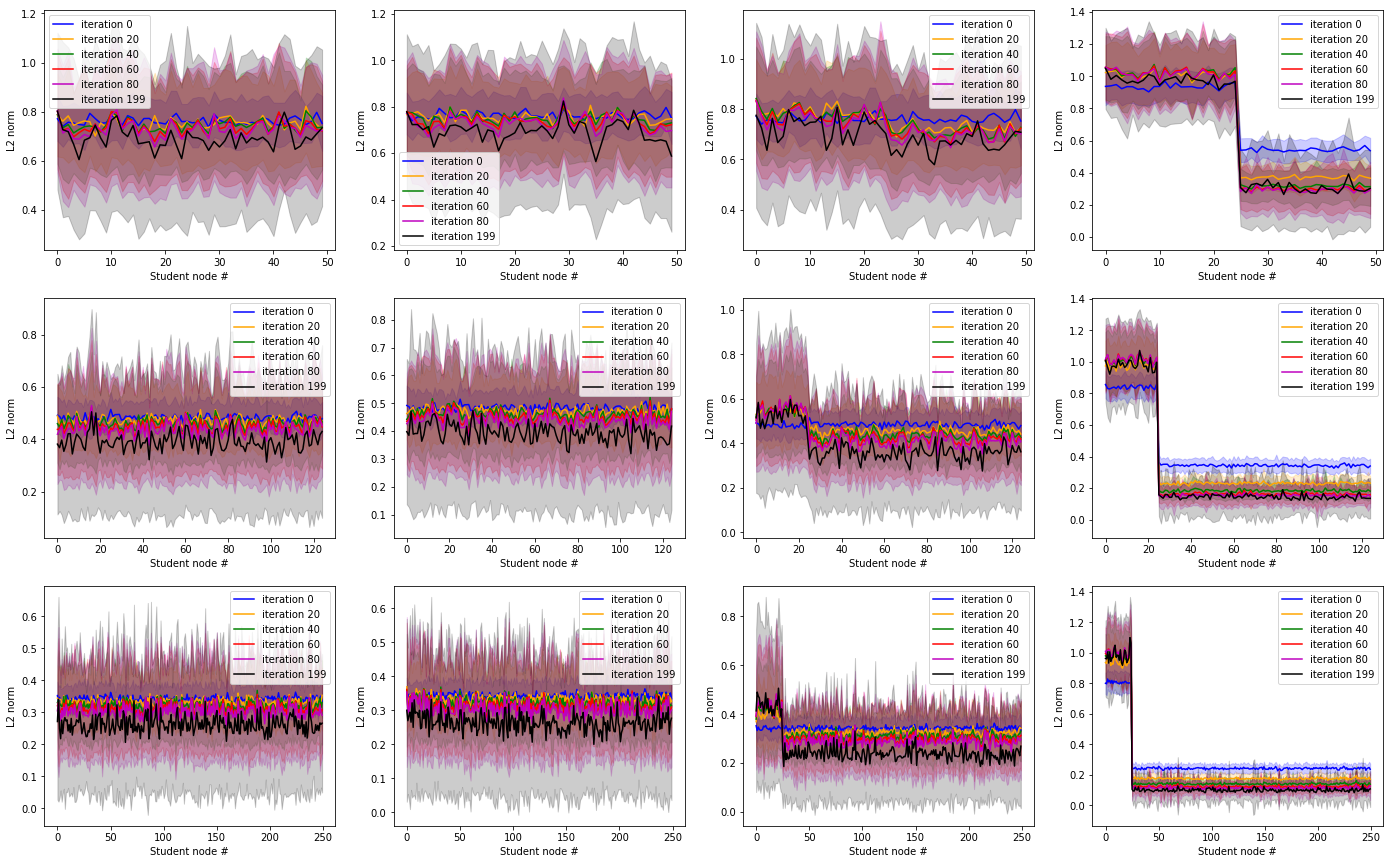

In [15]:
plt.figure(figsize=(24, 15))

multis = (2, 5, 10)
perturbs = ([1,0,0], [1,0.3,0], [1,1,0], [1,1,1])
layer = 2

count = 1
for node_multi in multis:
    for perturb in perturbs:
        plt.subplot(len(multis), len(perturbs), count)
        count += 1

        plot_datas = []
        legends = []

        for i in (0, 20, 40, 60, 80, 199):
            # f = ArgFilter(perturb=perturb, ks=[10, 20, 30], node_multi=node_multi)
            f = ArgFilter(perturb=perturb, ks=[10, 15, 25, 30], node_multi=node_multi)
            plot_data = PlotData(f.info())

            label = "iteration %d" % i
            legends.append(label)

            for stats in all_stats3:
                if not f.check(stats["args"]):
                    continue
                w_final_norm = stats["data"][i]["Ws"][layer].norm(dim=1)[:-1]
                n = w_final_norm.size(0)
                plot_data.add({
                    "x": np.array(list(range(n))), 
                    label : w_final_norm.numpy()
                })
            plot_datas.append(plot_data)

        colors = ["b", "orange", "g", "r", "m", "k"]    
        for plot_data, legend, c in zip(plot_datas, legends, colors):
            plot_data.plot(plt, "x", [legend], [c]) 

        #plt.axis([0, None, 0.8, 2.0])
        plt.xlabel('Student node #')
        plt.ylabel('L2 norm')

        plt.legend()

plt.savefig("thm5_3layers.pdf")